# Tips

- **total_bill:** The total price of the meal. (Including tip and tax.)
- **tip**
- **sex:** gender of the person paying the fee. (0 = Male, 1 = Female)
- **smoker:** Are there any smokers in the group? (0 = No, 1 = Yes)
- **day:** (3 = Thur, 4 = Fri, 5 = Sat, 6 = Sun)
- **time:** (0 = Day, 1 = Night)
- **size:** How many people are in the group?

In [18]:
import seaborn as sns
import matplotlib as plt
tips = sns.load_dataset("tips")

We take a copy of our data set so that it is a backup of our work in case of any other possibility.

In [5]:
df = tips.copy()

We ran the **head()** and **tail()** command for the first observation.

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


For descriptive statistics;

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In short, we preview the dataset with **value_counts()**.

In [7]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [8]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [9]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

We use boxplot;
- The first line shows the minimum value. 
- The place up to the second line shows the 25%. 
- The place up to the third line shows 50%, the point where the full line is the median. 
- The place up to the fourth line shows the 75%. 
- The last point shows the maximum value.

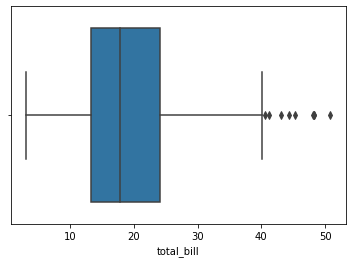

In [14]:
sns.boxplot(x = df["total_bill"]);

I made a missing value check.

In [15]:
df.isnull().values.any()

False

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Which days do we earn more?

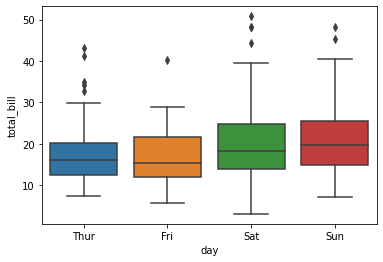

In [21]:
sns.boxplot(x = "day", y = "total_bill", data = df);

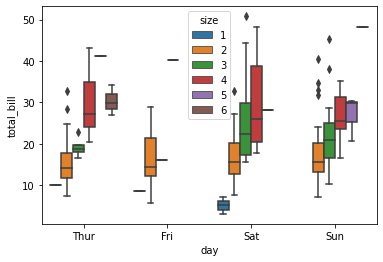

In [22]:
sns.boxplot(x = "day", y = "total_bill", hue = "size" ,data = df);

### Are we making more money in the morning or evening?

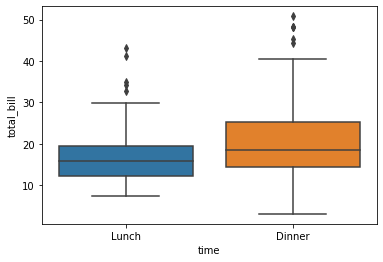

In [26]:
sns.boxplot(x = "time", y = "total_bill", data = df);

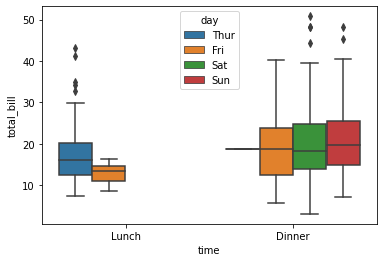

In [27]:
sns.boxplot(x = "time", y = "total_bill", hue = "day", data = df);

### Earnings by number of people.

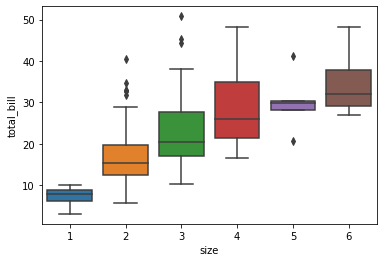

In [29]:
sns.boxplot(x = "size", y = "total_bill", data = df);

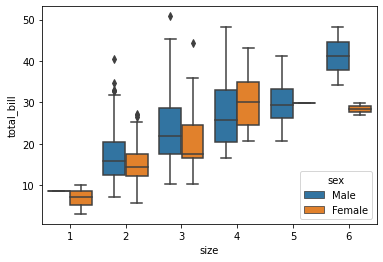

In [31]:
sns.boxplot(x = "size", y = "total_bill", hue = "sex", data = df);

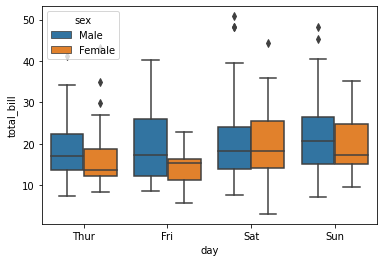

In [33]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

We create a violin chart; 
- In fact, it is very similar to boxplot. 
- It just allows us to examine it in a wider range.

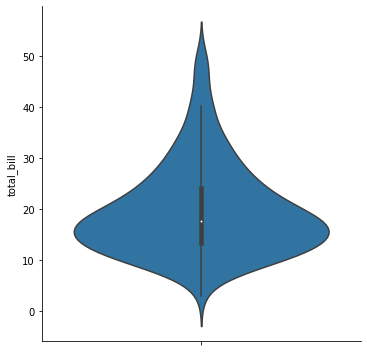

In [35]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

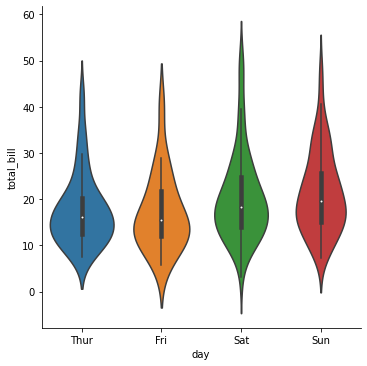

In [38]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

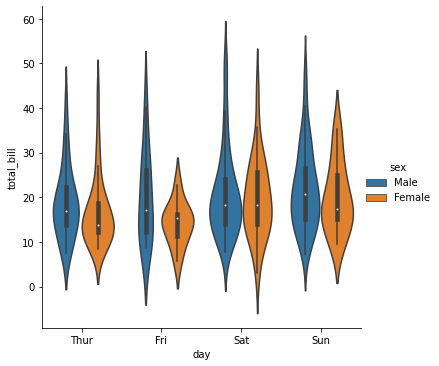

In [39]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

We're making a correlation chart. We use **scatterplot ()** for this. scatterplot() helps us to show the relationship between two numeric values.

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


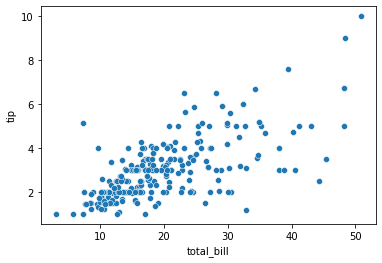

In [7]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

We cross with "time".

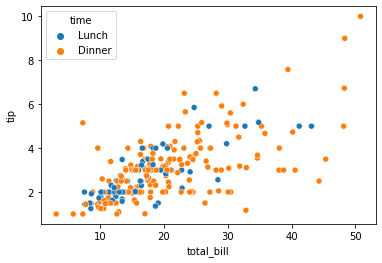

In [8]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

We improve our graphic by using style.

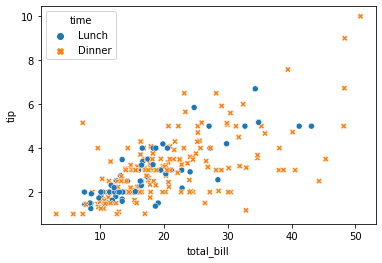

In [12]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

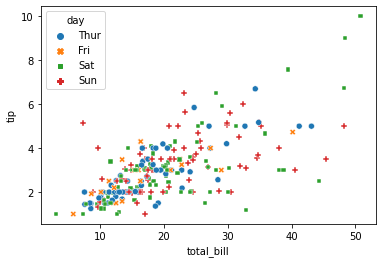

In [13]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df);

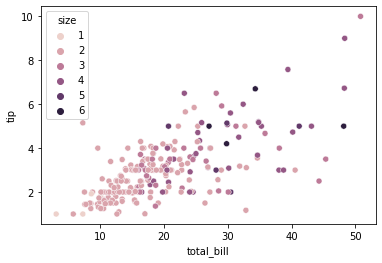

In [15]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", data = df);

We try to show the linear relationship.

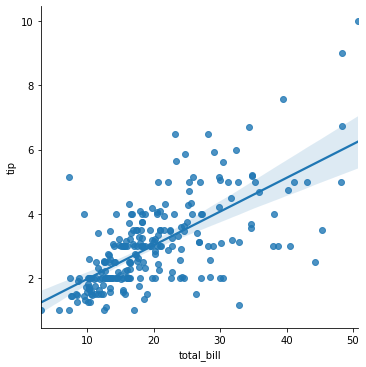

In [16]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

### I wonder if there is a relationship between smoking and tip and total_bill?

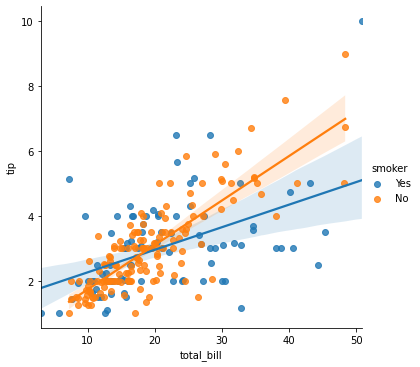

In [19]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

### If we think about lunch and dinner;

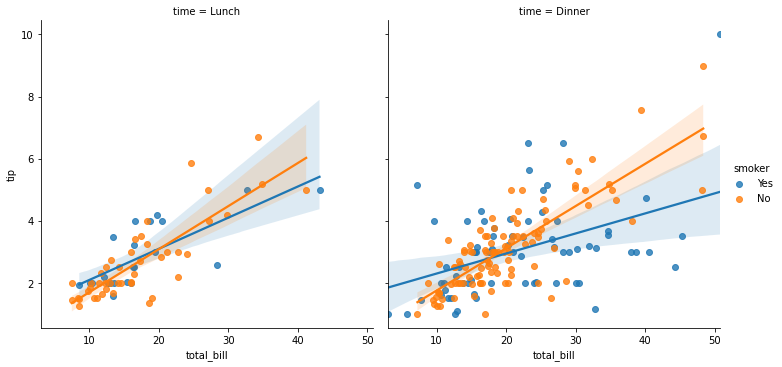

In [20]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

### And if we evaluate it according to gender;

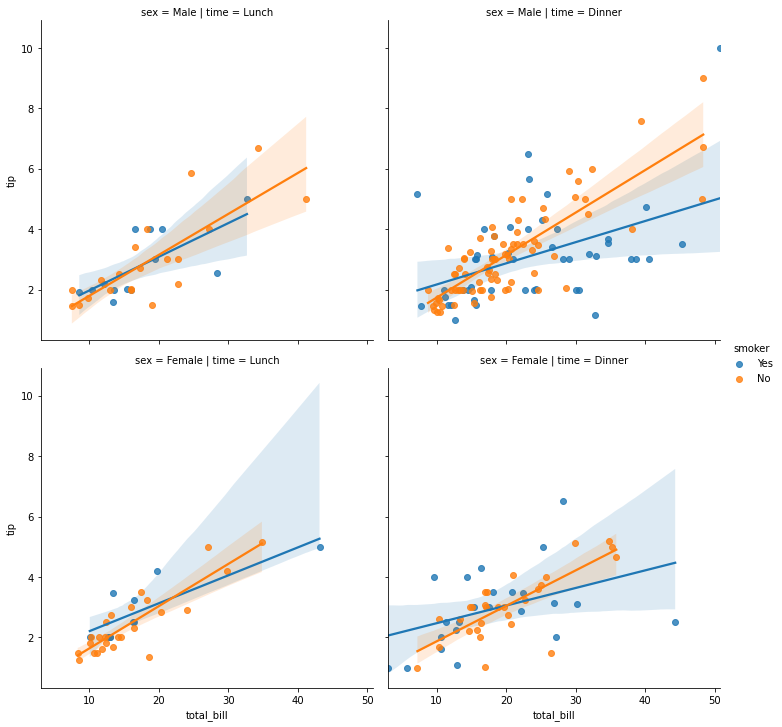

In [21]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);